###  Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

####  Reading the input dataset

In [2]:
data = pd.read_csv('ex1data1.txt',header = None)

In [3]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Splitting the data into feature and output parameters

In [4]:
x = data[0]
y = data[1]

#### Visualizing the data given

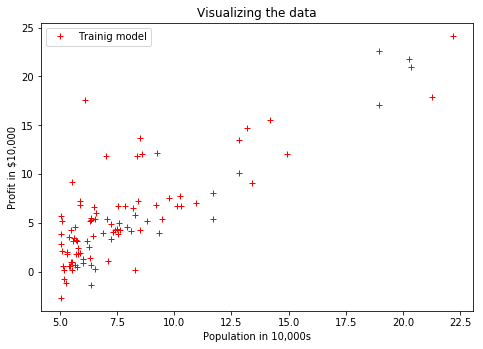

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y,'r+',label = "Trainig model")
ax.set_xlabel('Population in 10,000s')
ax.set_ylabel('Profit in $10,000')
ax.set_title('Visualizing the data')
ax.legend()

In [8]:
m = len(x)

####  Addition of one's vector to vectorize the data

In [9]:
X = pd.DataFrame({0:list(np.ones(m)),1:list(x)})
X.head()

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


In [10]:
y.head()

0    17.5920
1     9.1302
2    13.6620
3    11.8540
4     6.8233
Name: 1, dtype: float64

#### Initializing Theta,Learning rate and Number of iterations

In [11]:
theta = np.zeros(2);np.vectorize(theta);theta.reshape(2,1)
alpha = 0.01
iteration = 1500

 #### Function to compute cost 

In [12]:
def computecost(Xc,yc,theta):
    mc = Xc.shape[0]
    j = (1/(2*m)) * (sum(pow(((np.dot(Xc,theta))-y),2)))
    return j

####  Function to perform gradient descent

In [13]:
def gradientdesc(X,y,theta,alpha,iteration):
    m = X.shape[0]
    j = np.zeros(iteration)
    i = 0
    while(i<iteration):
        err = (np.dot(X,theta)) - y
        tmp0 = theta[0] - ((alpha/m) * (sum(err * X[0])))
        tmp1 = theta[1] - ((alpha/m) * (sum(err * X[1])))
        theta = np.array(([tmp0,tmp1]))
        j[i] = computecost(X,y,theta)
        i = i+1
    #plt.plot(j)
    return theta,j

In [14]:
t1 = gradientdesc(X,y,theta,alpha,iteration)

In [15]:
theta = t1[0]
j_hist = t1[1]

####  Using graphical method to check if gradient descent is converging

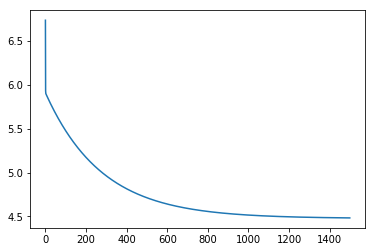

In [16]:
plt.plot(j_hist)

####  Final Theta values after applying Gradient Descent

In [17]:
print('Final theta Values after gradient Descent \n')
print ('theta0 : {one}, \ntheta1 : {two}'.format(one = theta[0],two = theta[1]))

Final theta Values after gradient Descent 

theta0 : -3.63029143940436, 
theta1 : 1.166362350335582


####  Visualizing the hypothetical function 

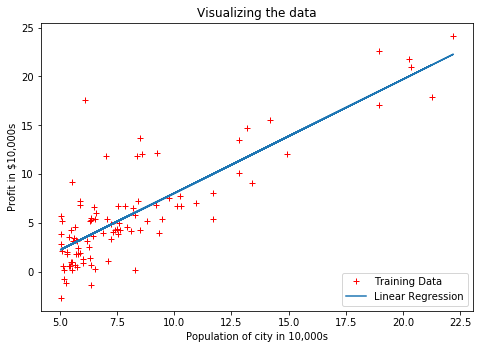

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y,'r+',label = "Training Data")
ax.set_xlabel('Population of city in 10,000s')
ax.set_ylabel('Profit in $10,000s')
ax.set_title('Visualizing the data')
ax.plot(X[1],(np.dot(X,theta)),label = 'Linear Regression')
ax.legend(loc = 4)

### Predicting profit for population of 35,000 and 70,000

In [19]:
print ('Profit prediction for population of 35,000 is',np.dot(np.array([1,3.5]),theta) * 10000)
print ('Profit prediction for population of 35,000 is',np.dot(np.array([1,7]),theta) * 10000)

Profit prediction for population of 35,000 is 4519.7678677017675
Profit prediction for population of 35,000 is 45342.45012944714


####  Visulazing the cost function

In [20]:
theta0_val = np.linspace(-10,10,100)
theta1_val = np.linspace(-1,4,100)
j_val = np.zeros((len(theta0_val),len(theta1_val)))
for i in np.arange(len(theta0_val)):
    for j in np.arange(len(theta1_val)):
        temp = np.array([theta0_val[i],theta1_val[j]])
        j_val[i,j] = computecost(X,y,temp)
j_hist = np.transpose(j_val)        

In [21]:
from mpl_toolkits .mplot3d.axes3d import Axes3D

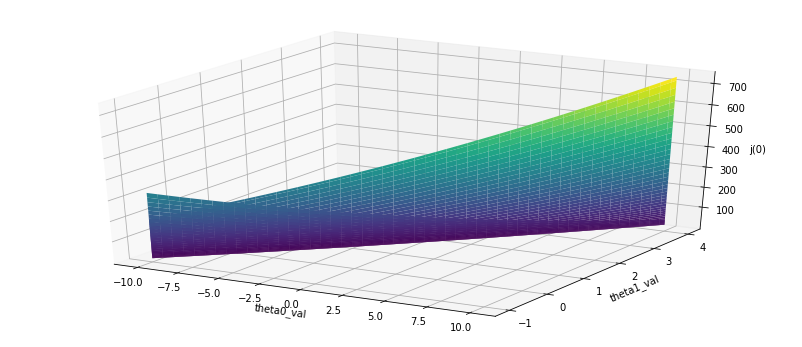

In [25]:
fig = plt.figure(figsize=(14,6))
p = fig.gca(projection = '3d')
surf = p.plot_surface(theta0_val,theta1_val,j_hist,cmap = 'viridis',linewidth = 0.2)
p.set_xlabel('theta0_val')
p.set_ylabel('theta1_val')
p.set_zlabel('j(0)')
#p.axis([theta0_val.max(),theta0_val.min(),theta1_val.max(),theta1_val.min()])
#p.view_init(30,90)
plt.draw()
    